# Random sampling

Modern numerical computing packages offer great tools for modeling the randomness of the real world. These include random number generators, which can be used to:
  1. simulate the properties of real-world random processes
  2. increase computational efficiency by taking fair random sub-samples of large datasets
  3. protect information through cryptography (actually this was the original impulse behind a lot of random number generator development)

Random number generators that are easily available to us are actually *pseudo*-random--meaning that they appear random, but are actually based on some deterministic process involving the computer's clock and fancy math and *could* be predictable if you had some key information about the process.

*Cryptographers*, the ones trying to protect data (use case 3 above), care about the difference between pseudo- and true randomness because they want to prevent adversaries from predicting random numbers and breaking their codes. For *economists*, the *"pseudo"* aspect is not a concern at all, because we only really care about use cases 1 and 2.

## Standard uniform distribution

The basic building block for random number generation is the standard uniform distribution, with PDF
$$ f(x) = \left \{ \begin{matrix*}[r l] 1 & \text{ if } x \in [0,1] \\
0 & \text{ otherwise }\end{matrix*}  \right.$$

...and CDF $$F(x) = \left \{ \begin{matrix*}[r l] 0 & \text{ if } x < 0 \\
x & \text{ if } x \in [0,1] \\
1 & \text{ if } x > 1\end{matrix*} \right.$$

### Quick exercise

 - Plot the standard uniform PDF and CDF.

### Standard uniform number generation

One convenient random number generation package is `numpy.random`. The `rand()` function draws from a standard uniform distribution:

import numpy as np

print('One single random number:',np.random.rand())
print('')

print('Five random numbers, using list comprehension:', [np.random.rand() for x in range(5)])
print('')

print('Five random numbers, passing argument to `rand()`:', np.random.rand(5))
print('')

print('Three by three array of random numbers:',np.random.rand(3,3))
print('')


## Histograms

Histograms are useful tools for visualizing and understanding the basic properties of data and simulation results.

`matplotlib.pyplot.hist()` works well, just feed in a list or array of values, and it will bin and plot it for you.

The `bins` keyword argument allows you to specify how many bins to use (default is 10).

If you set `density = True`, bin heights will be scaled so that total area under all of them sums to 1.

If you set `cumulative = True` bin heights will reflect the number of datapoints in the sample that fall within the current *or* one of the previous bins, moving from left to right.

Below we plot the empirical density and empirical cumulative distribution of 50 standard uniform draws:

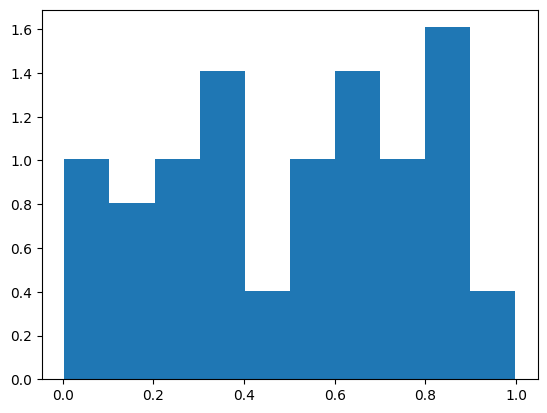

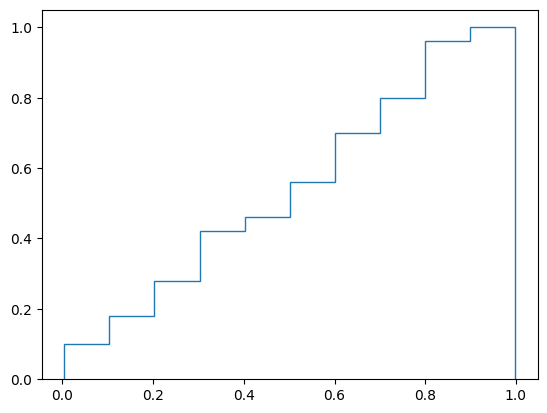

In [101]:
import matplotlib.pyplot as plt

standard_uniform_sample = np.random.rand(50)

plt.figure()
plt.hist(standard_uniform_sample,density=True)
plt.show()

plt.figure()
plt.hist(standard_uniform_sample,density=True,cumulative=True,histtype='step')
plt.show()

### Transformations of standard uniform

The simplest kind of transformation of the standard uniform is to make it into a uniform distribution with a different support.

If $X$ is standard uniform distributed from 0 to 1, then $$Y = a + b X $$

is uniform distributed from $a$ to $a+b$. The area under the curve still has to add up to 1, so the PDF and CDF are given by

$$ f(x) = \left \{ \begin{matrix*}[r l] \frac{1}{b} & \text{ if } x \in [a,a+b] \\
0 & \text{ otherwise }\end{matrix*}  \right.$$

...and CDF $$F(x) = \left \{ \begin{matrix*}[r l] 0 & \text{ if } x < a \\
x & \text{ if } x \in [a,a+b] \\
1 & \text{ if } x > a+b\end{matrix*} \right.$$


### Quick exercise

 - Make three independently-drawn samples from three different uniform variables:
   1. standard, from 0 to 1
   2. from -4 to -1
   3. from -2 to 16
 - Plot the theoretical density and the empirical density for each sample on the sample plot.
 - Plot the theoretical cumulative distribution and the empirical cumulative distribution for each sample on the same plot.


## Box-Mueller transform

Suppose we want a normally distribution random variable, instead of uniform. Through the power of mathemagic (aka the Box Muller transform), we can do this.

It just so happens, and you may prove in a later statistics class, that the following is true. If $U_0$ and $U_1$ are two independent standard uniform distributed variables, then $Z_0$ and $Z_1$, as given below, are two independent normally distributed variables:$$
\begin{align}
Z_0 &= \cos \left ( 2 \pi U_2 \right ) \sqrt{-2 \ln U_1}\\
Z_1 &= \sin \left ( 2 \pi U_2 \right ) \sqrt{-2 \ln U_1}
\end{align}
$$

### Quick exercise

 - Confirm that the Box-Muller transform indeed works. A visual proof is probably the most convenient. (You might get to learn the formal proof during your first year stats class!)

## Data

Data is often useful for learning about the world. Pandas is one popular Python package which can help us work with data.

Let's load some data on CA wildfire incidents between 2014 and 2023:

In [102]:
import pandas as pd

cawildfires_df = pd.read_csv('wildfires_CA.csv')

cawildfires_df

,state,firedep_id,incident_date,log_acres_burned,elevation
0,CA,1065,6112014,1.386294,300.0
1,CA,1555,5062014,0.000000,515.0
2,CA,1555,5142014,2.564949,520.0
3,CA,1555,4222014,0.000000,808.0
4,CA,1555,2222014,0.000000,346.0
...,...,...,...,...,...
41855,CA,58555,11102023,1.871802,1534.0
41856,CA,58555,11122023,-4.605170,1581.0
41857,CA,58555,12032023,-4.605170,1227.0
41858,CA,58555,12132023,-0.693147,1800.0


Pandas has loaded our data into a `dataframe` object, which is a convenient structure for working with data. We can see that there are 41,860 total records.

Let's plot the empirical distributions of the acres burned and the elevation of wildfire incidents:

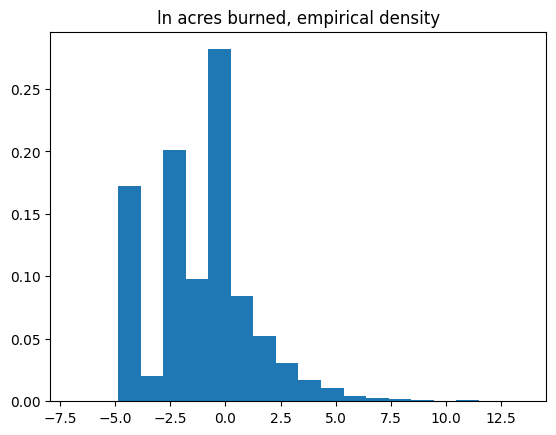

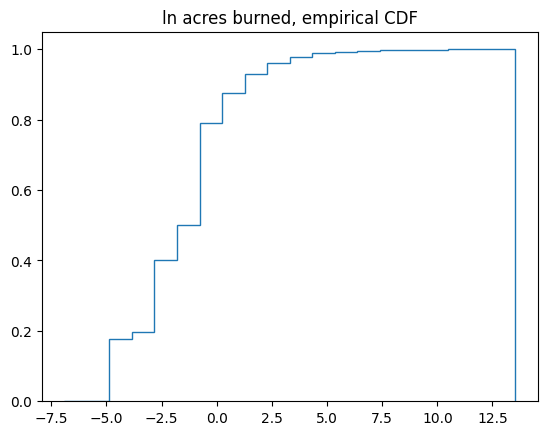

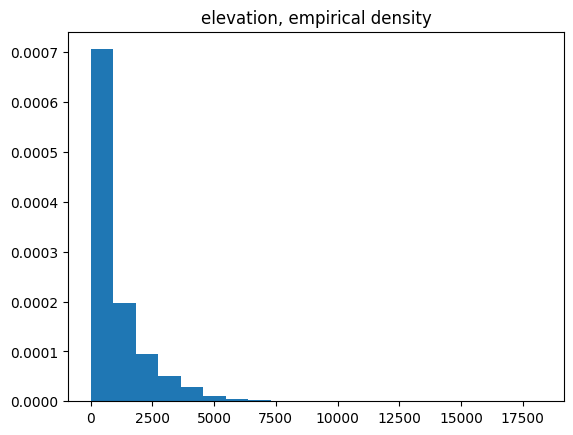

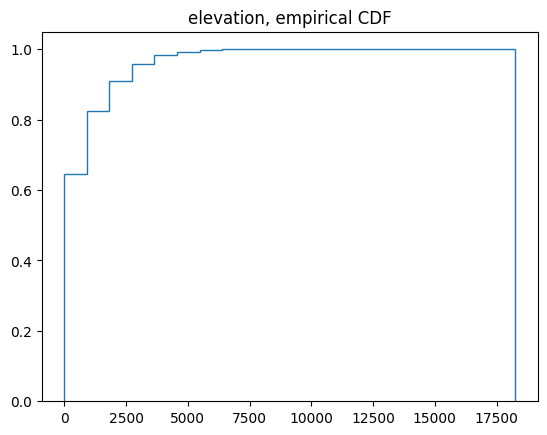

In [76]:
plt.figure()
plt.hist(cawildfires_df.log_acres_burned,bins=20,density=True)
plt.title('ln acres burned, empirical density')
plt.show()

plt.figure()
plt.hist(cawildfires_df.log_acres_burned,bins=20,density=True,cumulative=True,histtype='step')
plt.title('ln acres burned, empirical CDF')
plt.show()


plt.figure()
plt.hist(cawildfires_df.elevation,bins=20,density=True)
plt.title('elevation, empirical density')
plt.show()

plt.figure()
plt.hist(cawildfires_df.elevation,bins=20,density=True,cumulative=True,histtype='step')
plt.title('elevation, empirical CDF')
plt.show()


### Quick exercise

 - Calculate the mean and variance of each of the two variables we just plotted the distributions of.

## Sampling data

Another type of transformation we can make for a uniform random variable is to sample from data. When we do this, the result will be distributed according to the distribution of the data that was sampled.

It is easy to take a random subsample of a certain fraction of observations using a standard uniform variable. We do this below for 3 different 1% subsamples, plotting the empirical density of the log acres burned of each:



In [84]:
current_sample_df

,state,firedep_id,incident_date,log_acres_burned,elevation
30,CA,4030,6092014,1.945910,1280.0
93,CA,4555,4092014,0.000000,2567.0
200,CA,7555,6202014,0.693147,400.0
258,CA,9555,7062014,0.000000,701.0
274,CA,10032,4212014,0.000000,293.0
...,...,...,...,...,...
41422,CA,49555,8212023,-1.386294,141.0
41575,CA,52555,8092023,-0.223144,564.0
41584,CA,52555,9052023,-4.605170,570.0
41597,CA,52555,11292023,-4.605170,276.0


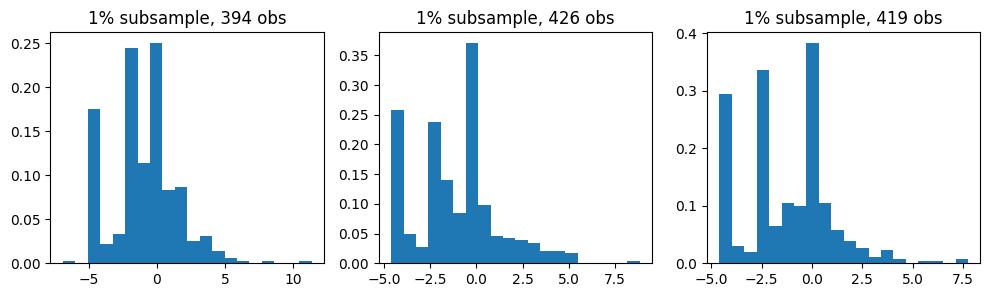

In [95]:
N_data = len(cawildfires_df)

f,ax = plt.subplots(1,3,figsize=(12,3))
for j in range(3):
    random_ind = np.random.rand(N_data)
    current_sample_df = cawildfires_df[random_ind < .01]
    ax[j].hist(current_sample_df.log_acres_burned,bins=20,density=True)
    ax[j].set_title(f'1% subsample, {len(current_sample_df):,d} obs')
plt.show()
    

It can be slightly trickier to get a sample of a specific size. We implement that below for 3 samples of 400:

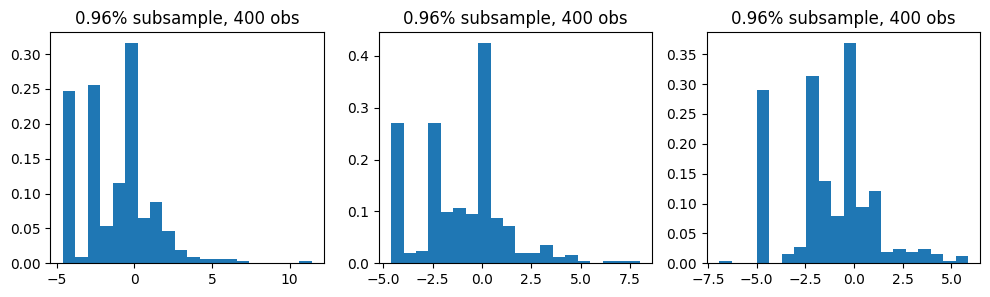

In [97]:
N_data = len(cawildfires_df)

f,ax = plt.subplots(1,3,figsize=(12,3))
for j in range(3):
    sorted_randoms = np.argsort(np.random.rand(N_data))
    current_sample_df = cawildfires_df.iloc[sorted_randoms[0:400]]
    ax[j].hist(current_sample_df.log_acres_burned,bins=20,density=True)
    ax[j].set_title(f'{400/N_data:.2%} subsample, 400 obs')
plt.show()


### Quick exercise

 - take a random sample of 100 incidents
 - plot the PDF and CDF of log acres burned and elevation for these incidents, together with the PDF/CDF of the corresponding population distribution, on the same plots. Do something sensible with styles and/or colors so it is easy to see both of the PDFs/CDFs that are sharing each graph.